In [34]:
import dedalus.public as de
import numpy as np
import matplotlib.pyplot as plt

Create a Dedalus basis (Chebyshev) and a domain (one-D here)

In [35]:
nr = 32
R1 = 7
R2 = 8

r = de.Chebyshev('r', nr, interval=(R1,R2))
d = de.Domain([r], grid_dtype=np.float)

r


/var/folders/c2/yhyz88v145qf1hvpjgtwf2900000gq/T/ipykernel_65541/1648237519.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = de.Domain([r], grid_dtype=np.float)


In [38]:
v_r_DNS = d.new_field()

You won't need to do this; you'll *load* data from your simulation

In [33]:
r = d.grid(0)

print(type(r))

v_r_DNS['g'] = np.sin(np.pi*(r-R1)) #['g'] means on the grid, not the coefficients

print(type(v_r_DNS))
print(v_r_DNS['g'])
#print(v_r_DNS['c'])

<class 'numpy.ndarray'>
<class 'dedalus.core.field.Field'>
[0.00189209 0.01700068 0.04705741 0.09169339 0.15024222 0.22162381
 0.30422131 0.3957763  0.49333008 0.59323713 0.69127036 0.78282586
 0.86321862 0.92804302 0.97355601 0.99703117 0.99703117 0.97355601
 0.92804302 0.86321862 0.78282586 0.69127036 0.59323713 0.49333008
 0.3957763  0.30422131 0.22162381 0.15024222 0.09169339 0.04705741
 0.01700068 0.00189209]


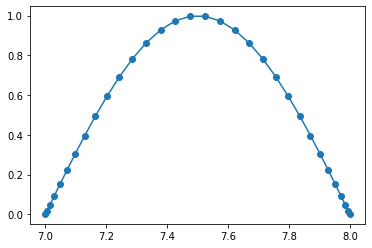

In [27]:
plt.plot(r, v_r_DNS['g'],'o-')

In [28]:
#derived_field = ((v_r_GQL - v_r_DNS)**2).evaluate() # must call evaluate()
derived_field = ((2 * v_r_DNS - v_r_DNS)**2).evaluate() # must call evaluate()

In [29]:
type(derived_field)

dedalus.core.field.Field

In [40]:
integ_v_r_DNS = v_r_DNS.integrate()

In [31]:
integ_v_r_DNS['g'][0]

0.6366197723675816

In [32]:
(np.cos(0) - np.cos(np.pi))/np.pi

0.6366197723675814